# Keras

1. Before installing Keras, install one of its backend engines: [TensorFlow](https://www.tensorflow.org/install/), [Theano](http://deeplearning.net/software/theano/install.html#install), or [CNTK](https://docs.microsoft.com/en-us/cognitive-toolkit/setup-cntk-on-your-machine). Keras recommend the TensorFlow backend.

    Optional dependencies:
    * [cuDNN](https://docs.nvidia.com/deeplearning/sdk/cudnn-install/) (recommended if you plan on running Keras on GPU).
    * HDF5 and [h5py](http://docs.h5py.org/en/latest/build.html) (required if you plan on saving Keras models to disk).
    * [graphviz](https://graphviz.gitlab.io/download/) and [pydot](https://github.com/erocarrera/pydot) (used by [visualization utilities](https://keras.io/visualization/) to plot model graphs).

2. **pip install keras**

> You may need administrator privilage when installing keras package. In windows right click and select "Run as administrator".

```sh
pip install keras
Collecting keras
  Downloading https://files.pythonhosted.org/packages/68/12/4cabc5c01451eb3b413d19ea151f36e33026fc0efb932bf51bcaf54acbf5/Keras-2.2.0-py2.py3-none-any.whl (300kB)
    100% |████████████████████████████████| 307kB 2.1MB/s
Collecting pyyaml (from keras)
  Downloading https://files.pythonhosted.org/packages/ad/d4/d895fb7ac1b0828151b829a32cefc8a8b58b4499570520b91af20982b880/PyYAML-3.13-cp35-cp35m-win_amd64.whl (205kB)
    100% |████████████████████████████████| 215kB 2.7MB/s
Collecting keras-applications==1.0.2 (from keras)
  Downloading https://files.pythonhosted.org/packages/e2/60/c557075e586e968d7a9c314aa38c236b37cb3ee6b37e8d57152b1a5e0b47/Keras_Applications-1.0.2-py2.py3-none-any.whl (43kB)
    100% |████████████████████████████████| 51kB 2.9MB/s
Collecting keras-preprocessing==1.0.1 (from keras)
  Downloading https://files.pythonhosted.org/packages/f8/33/275506afe1d96b221f66f95adba94d1b73f6b6087cfb6132a5655b6fe338/Keras_Preprocessing-1.0.1-py2.py3-none-any.whl
Collecting scipy>=0.14 (from keras)
  Downloading https://files.pythonhosted.org/packages/84/fc/f0adfaea340732ff25ccba17d1dd6fcc81fda302dbf31212ef7395463720/scipy-1.1.0-cp35-none-win_amd64.whl (31.1MB)
    100% |████████████████████████████████| 31.1MB 259kB/s
Collecting h5py (from keras)
  Downloading https://files.pythonhosted.org/packages/d0/2c/4572e2e495341e667c89b490ad18ea71a5f9e9fafca06109a9c7db22848b/h5py-2.8.0-cp35-cp35m-win_amd64.whl (2.3MB)
    100% |████████████████████████████████| 2.3MB 4.1MB/s
Requirement already satisfied: six>=1.9.0 in c:\users\rewang\appdata\local\conda\conda\envs\tensorflow\lib\site-packages (from keras) (1.11.0)
Requirement already satisfied: numpy>=1.9.1 in c:\users\rewang\appdata\local\conda\conda\envs\tensorflow\lib\site-packages (from keras) (1.14.5)
Installing collected packages: pyyaml, h5py, keras-applications, scipy, keras-preprocessing, keras
Successfully installed h5py-2.8.0 keras-2.2.0 keras-applications-1.0.2 keras-preprocessing-1.0.1 pyyaml-3.13 scipy-1.1.0
```

Below is an example with the Keras Sequential model

In [1]:
'''
https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 1060s 18ms/step - loss: 0.2696 - acc: 0.9166 - val_loss: 0.0683 - val_acc: 0.9792
Epoch 2/12
60000/60000 [==============================] - 1140s 19ms/step - loss: 0.0973 - acc: 0.9711 - val_loss: 0.0445 - val_acc: 0.9853
Epoch 3/12
60000/60000 [==============================] - 1091s 18ms/step - loss: 0.0777 - acc: 0.9772 - val_loss: 0.0400 - val_acc: 0.9870
Epoch 4/12
60000/60000 [==============================] - 1007s 17ms/step - loss: 0.0641 - acc: 0.9806 - val_loss: 0.0367 - val_acc: 0.9872
Epoch 5/12
60000/60000 [==============================] - 1031s 17ms/step - loss: 0.0557 - acc: 0.9829 - val_loss: 0.0395 - val_acc: 0.9878
Epoch 6/12
60000/60000 [==============================] - 1084s 18ms/step - loss: 0.0564 - acc: 0.9833 - val_loss: 0.0361 - val_acc: 0.9885
Epoch 7/12
60000/60000 [=============

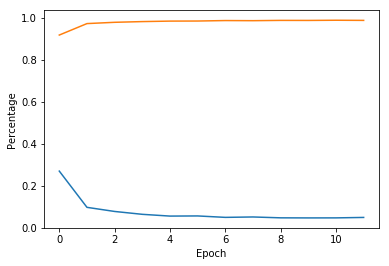

In [2]:
import matplotlib.pyplot as plt

loss=[0.2696,0.0973,0.0777,0.0641,0.0557,0.0564,0.0496,0.0515,0.0474,0.0470, 0.0472, 0.0493]
accarucy=[0.9166,0.9711,0.9772,0.9806,0.9829,0.9833,0.9855,0.9849,0.9863,0.9861, 0.9870, 0.9863]

plt.plot(loss)
plt.plot(accarucy)
plt.ylabel("Percentage")
plt.xlabel("Epoch")
plt.show()

##  How can we possibly improve the performance?

###   Multi-thread

Keras is thread safe, if you pay a little attention to it.

In **reinforcement learning** there is an algorithm called **[Asynchronous Advantage Actor Critics (A3C)](https://arxiv.org/pdf/1602.01783.pdf)** where each agent relies on the same neural network to tell them what they should do in a given state. In other words, each thread calls model.predict concurrently as in your problem. An example implementation with Keras of it is here.

You should, however, pay extra attention to this line if you looked into the code: 

```
model._make_predict_function() # have to initialize before threading
```

This is never mentioned in the Keras docs, but its necessary to make it work concurrently. In short, _make_predict_function is a function that compiles the predict function. In multi thread setting, you have to manually call this function to compile predict in advance, otherwise the predict function will not be compiled until you run it the first time, which will be problematic when many threading calling it at once. A detailed explanation [here](https://github.com/keras-team/keras/issues/6124).

